<a href="https://colab.research.google.com/github/Sp-supriya/Implementation-of-Movie-Recommender-System-Python/blob/main/Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of Movie Recommender System – Python**

In [1]:
from google.colab import files
files.upload()


Saving file.tsv to file.tsv


{'file.tsv': b'0\t50\t5\t881250949\r\n0\t172\t5\t881250949\r\n0\t133\t1\t881250949\r\n196\t242\t3\t881250949\r\n186\t302\t3\t891717742\r\n22\t377\t1\t878887116\r\n244\t51\t2\t880606923\r\n166\t346\t1\t886397596\r\n298\t474\t4\t884182806\r\n115\t265\t2\t881171488\r\n253\t465\t5\t891628467\r\n305\t451\t3\t886324817\r\n6\t86\t3\t883603013\r\n62\t257\t2\t879372434\r\n286\t1014\t5\t879781125\r\n200\t222\t5\t876042340\r\n210\t40\t3\t891035994\r\n224\t29\t3\t888104457\r\n303\t785\t3\t879485318\r\n122\t387\t5\t879270459\r\n194\t274\t2\t879539794\r\n291\t1042\t4\t874834944\r\n234\t1184\t2\t892079237\r\n119\t392\t4\t886176814\r\n167\t486\t4\t892738452\r\n299\t144\t4\t877881320\r\n291\t118\t2\t874833878\r\n308\t1\t4\t887736532\r\n95\t546\t2\t879196566\r\n38\t95\t5\t892430094\r\n102\t768\t2\t883748450\r\n63\t277\t4\t875747401\r\n160\t234\t5\t876861185\r\n50\t246\t3\t877052329\r\n301\t98\t4\t882075827\r\n225\t193\t4\t879539727\r\n290\t88\t4\t880731963\r\n97\t194\t3\t884238860\r\n157\t274\t4\t886890

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

column_names = ['user_id', 'item_id', 'rating', 'timestamp']

path = 'file.tsv'

df = pd.read_csv(path, sep='\t', names=column_names)

df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
from google.colab import files
files.upload()


Saving Movie_Id_Titles.csv to Movie_Id_Titles.csv


{'Movie_Id_Titles.csv': b'item_id,title\n1,Toy Story (1995)\n2,GoldenEye (1995)\n3,Four Rooms (1995)\n4,Get Shorty (1995)\n5,Copycat (1995)\n6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)\n7,Twelve Monkeys (1995)\n8,Babe (1995)\n9,Dead Man Walking (1995)\n10,Richard III (1995)\n11,Seven (Se7en) (1995)\n12,"Usual Suspects, The (1995)"\n13,Mighty Aphrodite (1995)\n14,"Postino, Il (1994)"\n15,Mr. Holland\'s Opus (1995)\n16,French Twist (Gazon maudit) (1995)\n17,From Dusk Till Dawn (1996)\n18,"White Balloon, The (1995)"\n19,Antonia\'s Line (1995)\n20,Angels and Insects (1995)\n21,Muppet Treasure Island (1996)\n22,Braveheart (1995)\n23,Taxi Driver (1976)\n24,Rumble in the Bronx (1995)\n25,"Birdcage, The (1996)"\n26,"Brothers McMullen, The (1995)"\n27,Bad Boys (1995)\n28,Apollo 13 (1995)\n29,Batman Forever (1995)\n30,Belle de jour (1967)\n31,Crimson Tide (1995)\n32,Crumb (1994)\n33,Desperado (1995)\n34,"Doom Generation, The (1995)"\n35,Free Willy 2: The Adventure Home (1995)\n36,Mad 

In [4]:
movie_titles = pd.read_csv('Movie_Id_Titles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
data = pd.merge(df, movie_titles, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [6]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

,rating
title,
Aiqing wansui (1994),5.0
Entertaining Angels: The Dorothy Day Story (1996),5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0
They Made Me a Criminal (1939),5.0


In [7]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

,rating
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [8]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())

ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())

ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [9]:
sns.set_style('white')
%matplotlib inline

<Axes: >

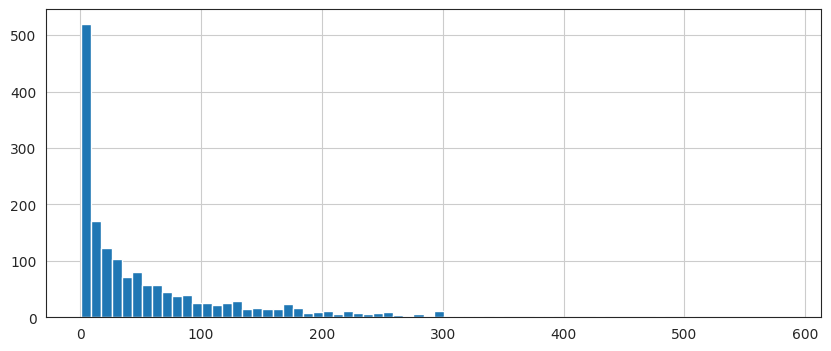

In [10]:
plt.figure(figsize =(10, 4))

ratings['num of ratings'].hist(bins = 70)

<Axes: >

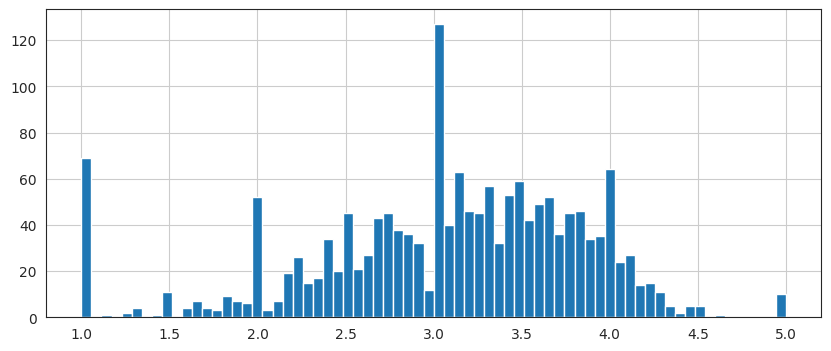

In [11]:
plt.figure(figsize =(10, 4))

ratings['rating'].hist(bins = 70)

In [12]:
moviemat = data.pivot_table(index ='user_id',
              columns ='title', values ='rating')

moviemat.head()

ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [13]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

starwars_user_ratings.head()

,Star Wars (1977)
user_id,
0,5.0
1,5.0
2,5.0
3,NaN
4,5.0


In [14]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)

corr_starwars.head()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [15]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)
corr_starwars = corr_starwars.join(ratings['num of ratings'])

corr_starwars.head()

corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [16]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation'])
corr_liarliar.dropna(inplace = True)

corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [17]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation'])
corr_liarliar.dropna(inplace = True)

corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
